<h2>Phase one Update </h2> 
<h3>Converting Clustering to Classification</h3>

 **importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC , SVC
from sklearn.metrics import mean_squared_error

In [3]:
#Read dataset
dataset=pd.read_json("finalCleanedData.csv")
dataset.head()

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...","[الأدب العربي, متنوعة]",اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...","[تطوير الذات, متنوعة]",اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[الأدب العربي],اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
3,الحياة في سبيل الله,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[اسلامية],اللغة العربية,100 صفحة,عدنان أوكطار,2.11 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
4,العظمة في كل مكان,[هارون يحيى],"[روي, كتب, عرب, عبر, ربط, ارخ, كعرب, او, لغة, ...",[الأدب العربي],اللغة العربية,140 صفحة,عدنان أوكطار,5.3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [4]:
#convert list to string in BookSummary
dataset["BookSummary"]=dataset["BookSummary"].apply(lambda row: ' '.join(row))
dataset.head()

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,"[الأدب العربي, متنوعة]",اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,"[تطوير الذات, متنوعة]",اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,[الأدب العربي],اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
3,الحياة في سبيل الله,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,[اسلامية],اللغة العربية,100 صفحة,عدنان أوكطار,2.11 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
4,العظمة في كل مكان,[هارون يحيى],روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,[الأدب العربي],اللغة العربية,140 صفحة,عدنان أوكطار,5.3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [5]:
#convert list to string in Author and Class columns
dataset["Author"]=dataset["Author"].apply(lambda row: '-'.join(row))
dataset["Class"]=dataset["Class"].apply(lambda row: '-'.join(row))
dataset.head()

,BookTitle,Author,BookSummary,Class,Language,Pages,publisher,BookSize,format,DownloadURL,PageURL
0,التضحية عند الحيوان,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,الأدب العربي-متنوعة,اللغة العربية,160 صفحة,عدنان أوكطار,5 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,معجزة الذرة,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,تطوير الذات-متنوعة,اللغة العربية,136 صفحة,عدنان أوكطار,3.41 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,لا تتجاهل,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,الأدب العربي,اللغة العربية,100 صفحة,عدنان أوكطار,3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
3,الحياة في سبيل الله,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,اسلامية,اللغة العربية,100 صفحة,عدنان أوكطار,2.11 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...
4,العظمة في كل مكان,هارون يحيى,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,الأدب العربي,اللغة العربية,140 صفحة,عدنان أوكطار,5.3 ميغابايت,PDF,https://www.arab-books.com/books/%d9%83%d8%aa%...,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [6]:
print("the number od unique on Author column : ",len(dataset["Author"].unique()))
print ("the number od unique on Class column : ",len(dataset["Class"].unique()))

the number od unique on Author column :  581
the number od unique on Class column :  267


In [7]:
#takeing Important columns 
Dataset = dataset[["BookTitle","BookSummary","Author","Class"]]

In [8]:
Dataset.head()

,BookTitle,BookSummary,Author,Class
0,التضحية عند الحيوان,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,الأدب العربي-متنوعة
1,معجزة الذرة,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,تطوير الذات-متنوعة
2,لا تتجاهل,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,الأدب العربي
3,الحياة في سبيل الله,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,اسلامية
4,العظمة في كل مكان,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,الأدب العربي


<h3>Label Encoding (Author - class)</h3> 

In [9]:
#label Encoding on Author for first classification 
Dataset.insert(3,"Author_encode", LabelEncoder().fit_transform(Dataset["Author"].values), True)
#label Encoding on class for first classification 
Dataset.insert(5,"Class_encode", LabelEncoder().fit_transform(Dataset["Class"].values), True)

In [10]:
Dataset.head()

,BookTitle,BookSummary,Author,Author_encode,Class,Class_encode
0,التضحية عند الحيوان,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,الأدب العربي-متنوعة,78
1,معجزة الذرة,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,تطوير الذات-متنوعة,217
2,لا تتجاهل,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,الأدب العربي,48
3,الحياة في سبيل الله,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,اسلامية,12
4,العظمة في كل مكان,روي كتب عرب عبر ربط ارخ كعرب او لغة عرب ارخ حد...,هارون يحيى,547,الأدب العربي,48


<h3>Vectorize Text by Term frequency–Inverse document frequency</h3> 

In [11]:
#vectorize Text by Term frequency–Inverse document frequency
tfidf_vect = TfidfVectorizer(smooth_idf=False)
tfidf = tfidf_vect.fit_transform(Dataset['BookSummary'].values)
tfidf.shape

(5898, 15872)

In [12]:
tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
len(tfidf_vect.get_feature_names())

15872

<h3>convert data to np array</h3> 

In [14]:
#convert data to np array
X = tfidf.toarray()
y_Authors = np.array(Dataset["Author_encode"])
y_Classes = np.array(Dataset["Class_encode"])

In [15]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
y_Authors

array([547, 547, 547, ..., 314, 225, 107])

<h2>Classification based on Authors as a label </h2> 

<h3>Split data into training and testing </h3> 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Authors, test_size=0.3)

<h3>build and fit LinearSVC model </h3> 

In [18]:
model =LinearSVC()
history=model.fit(X_train,y_train)
print("training data accu : ",round(model.score(X_train,y_train)*100,2),"%")
print("Testing data accu: ",round(model.score(X_test,y_test)*100,2),"%")

training data accu :  98.96 %
Testing data accu:  88.31 %


<h3>Predict and calculate mean square error</h3> 

In [19]:
training_y_hat=model.predict(X_train)
testing_y_hat=model.predict(X_test)
print("MSE on training data: ",mean_squared_error(y_train,training_y_hat))
print("MSE on testing data: ",mean_squared_error(y_test,testing_y_hat))

MSE on training data:  310.2395833333333
MSE on testing data:  7486.724293785311


<h3>visualize some of predicted data</h3> 

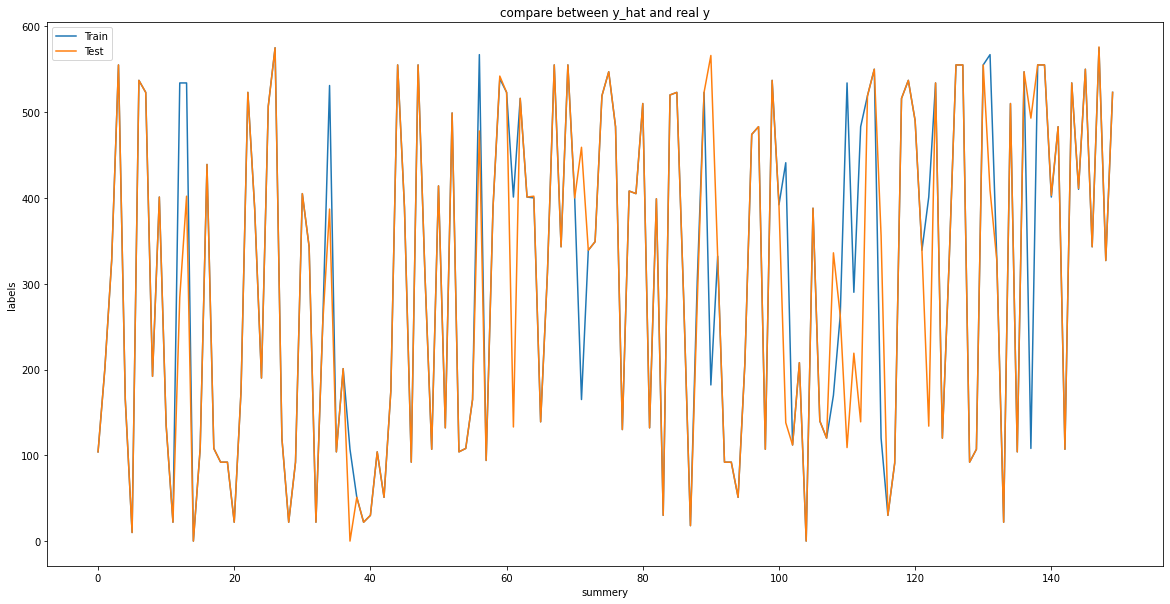

In [20]:
# Plot train vs test accuracy per epoch
plt.figure(figsize=(20, 10))
# Use the history metrics
plt.plot(testing_y_hat[:150])
plt.plot(y_test[:150])

# Make it pretty
plt.title('compare between y_hat and real y')
plt.ylabel('labels')
plt.xlabel('summery')
plt.legend(['Train', 'Test'])
plt.show()

<h2>Classification based on classes as a label </h2> 

<h3>Split data into training and testing </h3> 

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_Classes, test_size=0.45, random_state=1)

<h3>build and fit LinearSVC model </h3> 

In [22]:
model2 =LinearSVC()
history2=model2.fit(X_train2,y_train2)
print("training data accu : ",round(model2.score(X_train2,y_train2)*100,2),"%")
print("Testing data accu: ",round(model2.score(X_test2,y_test2)*100,2),"%")

training data accu :  95.71 %
Testing data accu:  74.01 %


<h3>Predict and calculate mean square error</h3> 

In [23]:
training_y_hat2=model2.predict(X_train2)
testing_y_hat2=model2.predict(X_test2)
print("MSE on training data: ",mean_squared_error(y_train2,training_y_hat2))
print("MSE on testing data: ",mean_squared_error(y_test2,testing_y_hat2))

MSE on training data:  632.0841813135985
MSE on testing data:  3066.5969868173256


<h3>visualize some of predicted data</h3> 

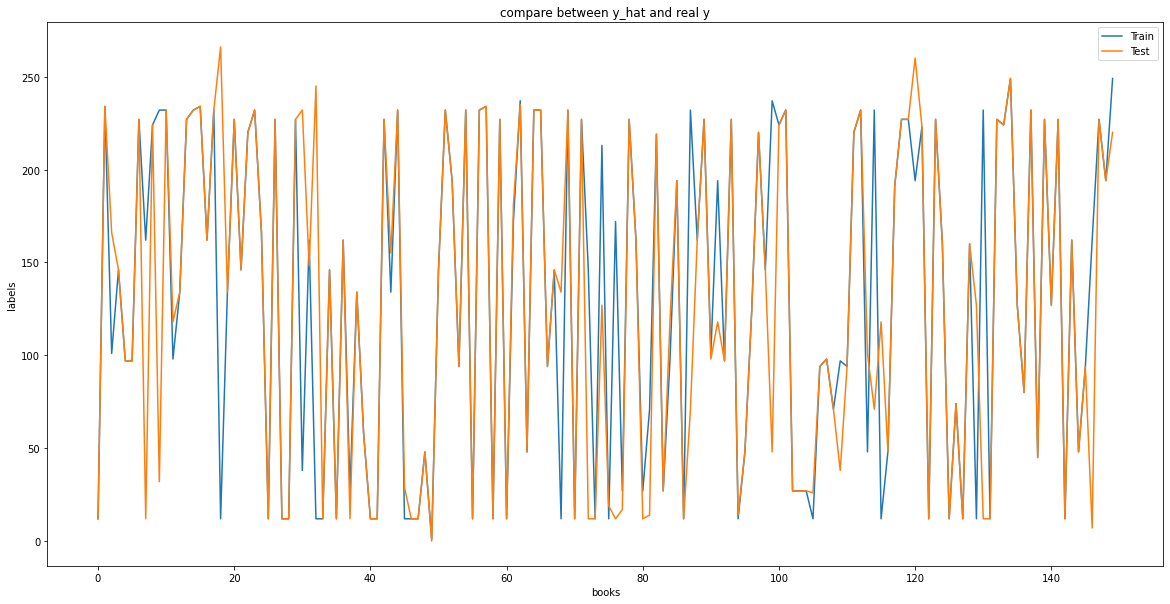

In [24]:
# Plot train vs test accuracy per epoch
plt.figure(figsize=(20, 10))
# Use the history metrics
plt.plot(testing_y_hat2[:150])
plt.plot(y_test2[:150])

# Make it pretty
plt.title('compare between y_hat and real y')
plt.ylabel('labels')
plt.xlabel('books')
plt.legend(['Train', 'Test'])
plt.show()

<h2>Keyword list</h2> 

In [25]:
tfidf_vect.get_feature_names()

['ءاب',
 'ءات',
 'ءاتنـ',
 'ءاذ',
 'ءام',
 'ءامنـ',
 'ءة',
 'ءله',
 'ءمر',
 'ءمن',
 'ءنـ',
 'ءى',
 'ءيي',
 'آآخ',
 'آثر',
 'آثم',
 'آجل',
 'آخذ',
 'آخر',
 'آخـر',
 'آدب',
 'آدم',
 'آذر',
 'آرء',
 'آرئ',
 'آرثر',
 'آزر',
 'آزق',
 'آسر',
 'آسو',
 'آسي',
 'آسياو',
 'آشر',
 'آفق',
 'آكل',
 'آلئ',
 'آلف',
 'آلم',
 'آمر',
 'آمل',
 'آينش',
 'أؤد',
 'أؤدب',
 'أؤكد',
 'أئل',
 'أئم',
 'أبء',
 'أبحاث',
 'أبحث',
 'أبد',
 'أبدأ',
 'أبر',
 'أبرد',
 'أبرز',
 'أبسط',
 'أبشر',
 'أبشع',
 'أبصار',
 'أبصر',
 'أبط',
 'أبطال',
 'أبطر',
 'أبطل',
 'أبع',
 'أبعاد',
 'أبعد',
 'أبق',
 'أبقى',
 'أبكى',
 'أبلغ',
 'أبلغو',
 'أبناء',
 'أبنائ',
 'أبهم',
 'أبو',
 'أبواب',
 'أبى',
 'أتأكد',
 'أتباع',
 'أتبع',
 'أتج',
 'أتجول',
 'أتح',
 'أتحد',
 'أتحدث',
 'أتخيل',
 'أتر',
 'أترب',
 'أترجم',
 'أتزوج',
 'أتشوق',
 'أتصل',
 'أتظاهر',
 'أتـم',
 'أتف',
 'أتفقد',
 'أتفوق',
 'أتق',
 'أتقلب',
 'أتم',
 'أتمم',
 'أتمنى',
 'أتناول',
 'أتو',
 'أتوار',
 'أتوقف',
 'أتولى',
 'أتى',
 'أثؤ',
 'أثب',
 'أثث',
 'أثر',
 'أثرى',
 'أثقل',
 'أث

In [26]:
table=pd.DataFrame(tfidf.toarray(),columns=tfidf_vect.get_feature_names(),index=Dataset["BookTitle"])

In [27]:
table=table.T

In [28]:
table

BookTitle,التضحية عند الحيوان,معجزة الذرة,لا تتجاهل,الحياة في سبيل الله,العظمة في كل مكان,معجزة الجهاز المناعي,الرومنسية سلاح بيد الشيطان,رحلة في الكون,التصميم في الطبيعة,معجزة خلق الإنسان,...,قوة التحفيز ابراهيم الفقى,الأربعون النووية وتتمتها,عقل جديد كامل,امرأة من طراز خاص,رواية البؤساء الجزء الأول,قوانين الكاريزما,وأخيرا اكتشفت السعادة,ما بعد المريخ والزهرة,لأنك الله رحلة إلى السماء السابعة,علم نفس النجاح
ءاب,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ءات,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ءاتنـ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ءاذ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ءام,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ييك,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ييل,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ييم,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
يين,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
table[table.columns[0]].sort_values(ascending=False )[:20].index.values

array(['حيو', 'يحى', 'هار', 'خلق', 'ضحي', 'عجز', 'اذج', 'عار', 'كتب',
       'فرخ', 'كطر', 'اسم', 'سؤل', 'تعا', 'رقء', 'نشء', 'كفل', 'يثر',
       'رحم', 'حبة'], dtype=object)

In [100]:
important_words={}
for column in table.columns[:10]:
    important_words[column] = table[column].sort_values(ascending=False )[:20].index.values

In [91]:
important_words

{' التضحية عند الحيوان': array(['حيو', 'يحى', 'هار', 'خلق', 'ضحي', 'عجز', 'اذج', 'عار', 'كتب',
        'فرخ', 'كطر', 'اسم', 'سؤل', 'تعا', 'رقء', 'نشء', 'كفل', 'يثر',
        'رحم', 'حبة'], dtype=object),
 ' معجزة الذرة': array(['ذرت', 'عجز', 'ذرة', 'يحى', 'هار', 'خلق', 'جسم', 'كون', 'عار',
        'كتب', 'كطر', 'اسم', 'رقء', 'نشء', 'طلس', 'عدن', 'لحد', 'وبالدليل',
        'نبي', 'عدم'], dtype=object),
 ' لا تتجاهل': array(['خلق', 'عجز', 'جهل', 'يحى', 'كون', 'هار', 'انس', 'حقق', 'الل',
        'عار', 'كتب', 'كطر', 'اسم', 'رقء', 'نشء', 'امك', 'طلس', 'وجد',
        'عدن', 'تمر'], dtype=object),
 ' الحياة في سبيل الله': array(['سبل', 'يحى', 'هار', 'الل', 'جهد', 'عجز', 'عار', 'سعى', 'حية',
        'رضة', 'خلق', 'كتب', 'كطر', 'رضو', 'اسم', 'دنو', 'رقء', 'نشء',
        'حقق', 'طلس'], dtype=object),
 ' العظمة في كل مكان': array(['خلق', 'يحى', 'هار', 'عجز', 'عظم', 'عار', 'نظا', 'تبر', 'أدل',
        'كتب', 'كطر', 'اسم', 'رقء', 'نشء', 'كون', 'نبع', 'كامل', 'شيء',
        'طلس', 'وجد'], dtype=obj

In [101]:
pd.DataFrame(important_words)

,التضحية عند الحيوان,معجزة الذرة,لا تتجاهل,الحياة في سبيل الله,العظمة في كل مكان,معجزة الجهاز المناعي,الرومنسية سلاح بيد الشيطان,رحلة في الكون,التصميم في الطبيعة,معجزة خلق الإنسان
0,حيو,ذرت,خلق,سبل,خلق,نعي,يحى,يحى,خلق,عجز
1,يحى,عجز,عجز,يحى,يحى,جهز,هار,هار,يحى,يحى
2,هار,ذرة,جهل,هار,هار,عجز,رومنس,عجز,هار,هار
3,خلق,يحى,يحى,الل,عجز,هار,سلح,كون,درو,خلق
4,ضحي,هار,كون,جهد,عظم,خلق,عجز,نشء,عجز,جسم
5,عجز,خلق,هار,عجز,عار,يحى,كتب,عار,صمم,عار
6,اذج,جسم,انس,عار,نظا,جسم,شيط,كتب,تطر,كتب
7,عار,كون,حقق,سعى,تبر,عار,خلق,خلق,طبع,كطر
8,كتب,عار,الل,حية,أدل,كتب,اسم,كطر,تدرج,اسم
9,فرخ,كتب,عار,رضة,كتب,كطر,عار,اسم,عار,رقء
